<a href="https://www.kaggle.com/code/matinmahmoudi/descriptive-statistics?scriptVersionId=168848560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Descriptive Statistics  
Descriptive statistics is a branch of **statistics** that focuses on **summarizing** and **describing** the main features of a dataset. It includes measures such as **mean**, **median**, **mode**, **range**, **variance**, and **standard deviation**, providing a concise overview of **central tendency**, **dispersion**, and the **shape of the data distribution**. In the context of **data mining** and **data science**, descriptive statistics play a pivotal role in the initial exploration and **understanding of datasets**. These statistics serve as a foundation for more advanced analyses by offering **insights** into the characteristics and **patterns** within the data.
  
  
In **data mining**, descriptive statistics act as a crucial precursor to more **complex analytical techniques**. They help **data scientists** identify **outliers**, **anomalies**, and **trends**, guiding the **selection** of appropriate models and algorithms for further exploration. Descriptive statistics also contribute to **data preprocessing** by revealing **missing values** or **skewed distributions**, enabling informed decisions about **data cleaning** and **transformation**. Additionally, these statistics play a vital role in data **visualization**, aiding in the communication of findings to both technical and non-technical audiences. Overall, descriptive statistics are integral to the **early stages** of data mining and data science, providing a fundamental understanding of datasets and guiding subsequent analyses for meaningful insights.

### Read Data
To read a **.sav** file in Python and access **variable labels** and **value labels**, you can use the pandas library in combination with the **pyreadstat** library. pyreadstat is a Python library that allows you to read data from SPSS .sav files, and it can also extract variable labels and value labels.

Here are the steps to do this:

#### Install the pyreadstat if you haven't already:

In [1]:
!pip install pyreadstat

  Obtaining dependency information for pyreadstat from https://files.pythonhosted.org/packages/9c/78/fb11f0b012ad3a3472d6ba34cff457c21831846a679b4e39ae809cb6c9bb/pyreadstat-1.2.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.0 MB/s eta 0:00:00


In [2]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Specify the path to your .sav file
sav_file = "/kaggle/input/breast-cancer-survival/Breast cancer survival.sav"

# Read the .sav file
df, meta = pyreadstat.read_sav(sav_file)
df

,id,age,pathsize,lnpos,histgrad,er,pr,status,time
0,1.0,60.0,NaN,0.0,3.0,0.0,0.0,0.0,9.466667
1,2.0,79.0,NaN,0.0,NaN,NaN,NaN,0.0,8.600000
2,3.0,82.0,NaN,0.0,2.0,NaN,NaN,0.0,19.333333
3,4.0,66.0,NaN,0.0,2.0,1.0,1.0,0.0,16.333333
4,5.0,52.0,NaN,0.0,3.0,NaN,NaN,0.0,8.500000
...,...,...,...,...,...,...,...,...,...
1202,1038.0,37.0,5.5,5.0,3.0,0.0,0.0,0.0,6.866667
1203,1039.0,64.0,6.0,0.0,3.0,0.0,1.0,0.0,15.766667
1204,1041.0,57.0,6.5,7.0,3.0,1.0,1.0,0.0,15.166667
1205,1202.0,51.0,5.5,11.0,2.0,0.0,0.0,1.0,45.133333


In [3]:
meta.column_names_to_labels

{'id': None,
 'age': 'Age (years)',
 'pathsize': 'Pathologic Tumor Size (cm)',
 'lnpos': 'Positive Axillary Lymph Nodes',
 'histgrad': 'Histologic Grade',
 'er': 'Estrogen Receptor Status',
 'pr': 'Progesterone Receptor Status',
 'status': 'Status',
 'time': 'Time (months)'}

In [4]:
meta.variable_value_labels

{'histgrad': {4.0: 'Unknown'},
 'er': {0.0: 'Negative', 1.0: 'Positive', 2.0: 'Unknown'},
 'pr': {0.0: 'Negative', 1.0: 'Positive', 2.0: 'Unknown'},
 'status': {0.0: 'Censored', 1.0: 'Died'}}

### Explore and Inspect Data Structure
Now try to data exploration and preprocessing of a Pandas DataFrame. the below code includes functions to provide an **overview** of the dataset's **structure** and statistical characteristics. The main focus is on **converting** specific variables to string format and categorizing them into either **categorical or continuous** types for further analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1207 non-null   float64
 1   age       1207 non-null   float64
 2   pathsize  1121 non-null   float64
 3   lnpos     1207 non-null   float64
 4   histgrad  920 non-null    float64
 5   er        869 non-null    float64
 6   pr        851 non-null    float64
 7   status    1207 non-null   float64
 8   time      1207 non-null   float64
dtypes: float64(9)
memory usage: 85.0 KB


In [6]:
# List of variables want to convert to string (categorical variables)
variables_to_convert = ['histgrad', 'er', 'pr', 'status']

# Loop through the columns and convert them to string
df[variables_to_convert] = df[variables_to_convert].astype(str).replace('nan', np.nan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1207 non-null   float64
 1   age       1207 non-null   float64
 2   pathsize  1121 non-null   float64
 3   lnpos     1207 non-null   float64
 4   histgrad  920 non-null    object 
 5   er        869 non-null    object 
 6   pr        851 non-null    object 
 7   status    1207 non-null   object 
 8   time      1207 non-null   float64
dtypes: float64(5), object(4)
memory usage: 85.0+ KB


In [8]:
df.describe()

,id,age,pathsize,lnpos,time
count,1207.000000,1207.000000,1121.000000,1207.000000,1207.000000
mean,621.072080,56.387738,1.733488,0.880696,46.956476
std,359.623207,13.327627,0.995857,2.535457,29.638977
min,1.000000,22.000000,0.100000,0.000000,2.633333
25%,310.500000,46.000000,1.000000,0.000000,22.550000
50%,619.000000,56.000000,1.500000,0.000000,42.966667
75%,931.500000,66.500000,2.200000,0.000000,65.583333
max,1266.000000,88.000000,7.000000,35.000000,133.800000


In [9]:
# Define categorical variables in a list
categorical_var = ['histgrad','er', 'pr', 'status']

# Define continuous variables in a list
continuous_var = ['age','pathsize', 'lnpos', 'time']

### Use Frequency Table and Mode for Categorical Variables
Frequency tables organize and display the **counts** and **percentages** of **different categories** in a dataset, offering a snapshot of categorical data distribution. Meanwhile, the mode pinpoints the **most frequently** occurring category, serving as a quick reference for the dominant aspect of the data. Together, they provide a concise yet insightful analysis, aiding in identifying patterns and making informed interpretations of categorical variables.

In [10]:
# Define frequency_table function to access frequency and percentage for each variable
def frequency_table(variable):
    # Get value counts and percentages
    value_counts = variable.value_counts(dropna=False)
    percentages = (value_counts / len(variable)) * 100

    # Create a DataFrame to store the value counts and percentages
    table = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

    return table

# Calculate frequency table and mode for each categorical variable
for var in categorical_var:
    print(f"Frequency table for {var}:")
    table = frequency_table(df[var])
    mode = df[var].mode().iloc[0]
    print(table)
    print("Mode =", mode)
    print("#" * 50)


Frequency table for histgrad:
          Count  Percentage
histgrad                   
2.0         514   42.584921
3.0         327   27.091964
NaN         287   23.777962
1.0          79    6.545153
Mode = 2.0
##################################################
Frequency table for er:
     Count  Percentage
er                    
1.0    531   43.993372
0.0    338   28.003314
NaN    338   28.003314
Mode = 1.0
##################################################
Frequency table for pr:
     Count  Percentage
pr                    
1.0    462   38.276719
0.0    389   32.228666
NaN    356   29.494615
Mode = 1.0
##################################################
Frequency table for status:
        Count  Percentage
status                   
0.0      1135   94.034797
1.0        72    5.965203
Mode = 0.0
##################################################


### Use Basic and Advanced Statistics for Continuous Variables
**Basic statistics** like **mean** and **standard deviation** offer a fundamental grasp of **continuous** variables. Going beyond, **skewness** and **kurtosis** provide advanced insights. Skewness indicates the distribution's asymmetry, with positive values suggesting a longer right tail and negative values indicating a longer left tail. Kurtosis measures the distribution's peakedness, with higher values indicating a more peaked shape. These **advanced statistics** add depth to understanding the nuances of continuous variables, offering a comprehensive view of **distributional characteristics** beyond basic measures.

In [11]:
# Descriptive Statistics: Continuous Variables

#######################################
##   Basic and Advanced Statistics   ##
#######################################

# Calculate basic statistics
basic_stats = df[continuous_var].describe()
basic_stats

,age,pathsize,lnpos,time
count,1207.000000,1121.000000,1207.000000,1207.000000
mean,56.387738,1.733488,0.880696,46.956476
std,13.327627,0.995857,2.535457,29.638977
min,22.000000,0.100000,0.000000,2.633333
25%,46.000000,1.000000,0.000000,22.550000
50%,56.000000,1.500000,0.000000,42.966667
75%,66.500000,2.200000,0.000000,65.583333
max,88.000000,7.000000,35.000000,133.800000


In [12]:
# Calculate advanced statistics
skewness = df[continuous_var].skew()
skewness

age         0.049489
pathsize    1.340715
lnpos       5.346459
time        0.630557
dtype: float64

In [13]:
# Calculate advanced statistics
kurtosis = df[continuous_var].kurtosis()
kurtosis

age         -0.765026
pathsize     2.659314
lnpos       43.047260
time        -0.239387
dtype: float64

In [14]:
# Concatenate basic and advanced statistics
concatenated_series = pd.concat([basic_stats.T, skewness.rename('skewness'), kurtosis.rename('kurtosis')], axis=1)
# Print results
print(concatenated_series)

           count       mean        std        min    25%        50%  \
age       1207.0  56.387738  13.327627  22.000000  46.00  56.000000   
pathsize  1121.0   1.733488   0.995857   0.100000   1.00   1.500000   
lnpos     1207.0   0.880696   2.535457   0.000000   0.00   0.000000   
time      1207.0  46.956476  29.638977   2.633333  22.55  42.966667   

                75%    max  skewness   kurtosis  
age       66.500000   88.0  0.049489  -0.765026  
pathsize   2.200000    7.0  1.340715   2.659314  
lnpos      0.000000   35.0  5.346459  43.047260  
time      65.583333  133.8  0.630557  -0.239387  


### Calculate Confidence Intervals for Means
A confidence interval for the mean is a statistical tool that provides a range within which we are reasonably **confident** the true population mean lies. Typically expressed as a percentage, such as 95% confidence interval, it signifies that if the **sampling process** were **repeated numerous times**, 95% of the intervals constructed **would contain** the **true population mean**. The confidence interval is calculated based on sample data, incorporating the **sample mean** and the **standard error** of the mean. Wider intervals indicate greater uncertainty, while narrower intervals suggest more precision. Researchers and analysts use confidence intervals to quantify the uncertainty surrounding their estimates and to make inferences about the population mean, adding a valuable dimension of reliability to statistical analyses.  
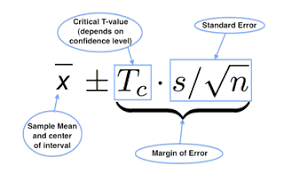

In [15]:
# Adding lower and upper confidence intervals
confidence_level = 0.95  # 95% confidence interval

# Calculate lower and upper confidence intervals using apply() method
lower_ci = df[continuous_var].dropna().apply(lambda values: stats.t.interval(confidence_level, len(values) - 1, loc=values.mean(), scale=stats.sem(values))[0])
upper_ci = df[continuous_var].dropna().apply(lambda values: stats.t.interval(confidence_level, len(values) - 1, loc=values.mean(), scale=stats.sem(values))[1])

# Add lower and upper confidence intervals to the concatenated series
concatenated_series['lower_ci'] = lower_ci
concatenated_series['upper_ci'] = upper_ci

print(concatenated_series)

           count       mean        std        min    25%        50%  \
age       1207.0  56.387738  13.327627  22.000000  46.00  56.000000   
pathsize  1121.0   1.733488   0.995857   0.100000   1.00   1.500000   
lnpos     1207.0   0.880696   2.535457   0.000000   0.00   0.000000   
time      1207.0  46.956476  29.638977   2.633333  22.55  42.966667   

                75%    max  skewness   kurtosis   lower_ci   upper_ci  
age       66.500000   88.0  0.049489  -0.765026  55.661067  57.214937  
pathsize   2.200000    7.0  1.340715   2.659314   1.675128   1.791847  
lnpos      0.000000   35.0  5.346459  43.047260   0.719201   1.007829  
time      65.583333  133.8  0.630557  -0.239387  44.667141  48.102945  


### Create Histograms for Visual Investigation   
Histograms are valuable tools for visual investigation in data analysis. These **graphical representations** provide a concise way to **explore the distribution** of a dataset, offering insights into the **frequency** and **patterns** of values within a variable. By creating histograms, analysts can quickly identify trends, outliers, and the **overall shape** of the data, facilitating a visual understanding of the underlying patterns and aiding in the formulation of further research questions or **data-driven decisions**.

Text(0.5, 1.0, 'Histogram for pathsize')

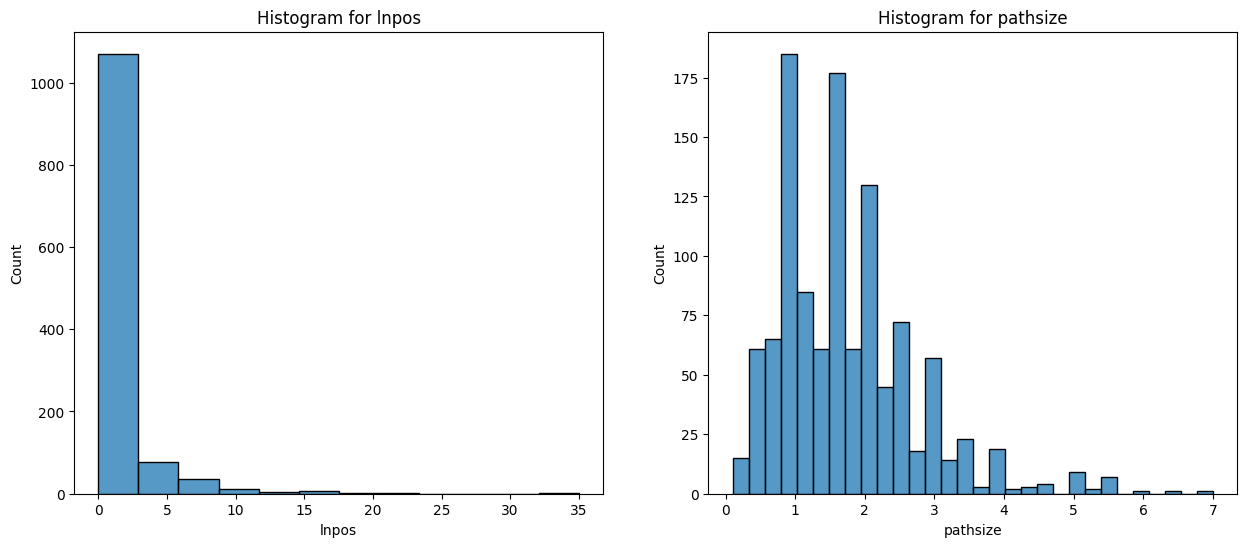

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(df['lnpos'], ax=ax[0])
ax[0].set_title('Histogram for lnpos')
sns.histplot(df['pathsize'], ax=ax[1])
ax[1].set_title('Histogram for pathsize')

### Use Discretization for Skewed Variables   
Discretization involves transforming **continuous** variables into discrete **categories** or bins. When dealing with **skewed** data, discretization can help mitigate the impact of extreme values and improve the robustness of statistical analyses. By converting skewed variables into discrete intervals, analysts can **simplify** the data structure, making it more amenable to certain modeling techniques and enhancing **interpretability**. This approach aims to manage the challenges posed by skewed distributions and contribute to a more effective and meaningful exploration of the underlying patterns within the data.

In [17]:
# Define bin edges
bin_edges = [-float('inf'), 0, float('inf')]

# Define bin labels
bin_labels = ['No', 'Yes']

# Categorize the 'lnpos'
df['lnpos_YN'] = pd.cut(df['lnpos'], bins=bin_edges, labels=bin_labels, right=True)

# Generate a frequency table for the 'lnpos_YN' column in the DataFrame 'df'
frequency_table(df['lnpos_YN'])

,Count,Percentage
lnpos_YN,,
No,929,76.967688
Yes,278,23.032312


In [18]:
# Define bin edges
bin_edges = [-float('inf'), 2, 5, float('inf')]

# Define bin labels
bin_labels = ['<= 2', '2 <  <= 5', '> 5']

# Categorize the 'pathsize'
df['pathsize_Cat'] = pd.cut(df['pathsize'], bins=bin_edges, labels=bin_labels, right=True)

# Generate a frequency table for the 'pathsize_Cat' column in the DataFrame 'df'
frequency_table(df['pathsize_Cat'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            1207 non-null   float64 
 1   age           1207 non-null   float64 
 2   pathsize      1121 non-null   float64 
 3   lnpos         1207 non-null   float64 
 4   histgrad      920 non-null    object  
 5   er            869 non-null    object  
 6   pr            851 non-null    object  
 7   status        1207 non-null   object  
 8   time          1207 non-null   float64 
 9   lnpos_YN      1207 non-null   category
 10  pathsize_Cat  1121 non-null   category
dtypes: category(2), float64(5), object(4)
memory usage: 87.6+ KB


### Create Cross-Tabulation for Two Categorical Variables  

Creating cross-tabulations is a valuable technique for investigating the **relationship** between **two categorical** variables. Cross-tabulation, also known as a **contingency table**, provides a structured overview of the **joint distribution** of the variables, highlighting how their values **co-occur**. This method is particularly useful in revealing patterns and associations between categorical variables, allowing analysts to discern connections, identify trends, and explore **potential dependencies**. By organizing the data in this manner, insights into the strength and nature of the relationship between the variables become more apparent, aiding researchers in making informed interpretations and informed decisions based on the observed patterns in the cross-tabulated results.

In [19]:
import pandas as pd

# Create a cross-tabulation with counts
cross_tab = pd.crosstab(df['lnpos_YN'], df['status'], normalize='index') # normalize: False/index/columns/all
cross_tab = pd.crosstab(df['pathsize_Cat'], df['status'], normalize='index') # normalize: False/index/columns/all

# Display the cross-tabulation with counts and row percentages
cross_tab


status,0.0,1.0
pathsize_Cat,,
<= 2,0.962470,0.037530
2 < <= 5,0.883392,0.116608
> 5,0.833333,0.166667


### Create Pivot Table for Categorical and Continuous Variables  
Creating a pivot table is a powerful approach to assess the **relationship** between **categorical** and **continuous** variables by **summarizing** key statistics such as mean, standard deviation, minimum, and maximum across different categories. This technique enables a comprehensive exploration of how the continuous variable varies within each category of the categorical variable. Additionally, incorporating **additional layers** by introducing other categorical variables adds **depth** to the analysis, allowing for a nuanced understanding of the relationships within the data. The pivot table serves as a dynamic tool, facilitating the comparison of statistical measures across various categories and providing a structured overview of the interplay between different variables. This method enhances the ability to uncover **patterns**, **trends**, and **dependencies** in the dataset, offering valuable insights for more informed decision-making and data-driven exploration.

In [20]:
import pandas as pd

# Create a pivot table with the mean of 'time' for each 'lnpos'
pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc='mean')

# Create a pivot table summarizing the mean and standard deviation of the 'time' grouped by the 'lnpos_YN'.
pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc=['mean','std'])

# Create a pivot table with aggregated statistics for 'time' and 'age' columns,grouping by the 'lnpos_YN'.
#The table includes mean and standard deviation for 'time',as well as minimum and maximum values for the 'age'.
pivot_table = df.pivot_table(values=['time','age'], index='lnpos_YN', aggfunc={'time':['mean','std'],
                                                                               'age':['min','max']})

# Create a pivot table with aggregated statistics for 'time' column,grouping by both 'lnpos_YN' and 'pathsize_Cat'.
# The table includes mean and standard deviation for 'time'.
pivot_table = df.pivot_table(values=['time'], index=['pathsize_Cat','lnpos_YN'], aggfunc=['mean','std'])

# Display the pivot table
pivot_table


mean        std
                            time       time
pathsize_Cat lnpos_YN                      
<= 2         No        47.057558  28.835447
             Yes       50.129167  31.580492
2 <  <= 5    No        46.315263  29.784837
             Yes       36.823297  26.825617
> 5          No        31.808333  16.465663
             Yes       35.616667  22.173851

## Data Visualization  


**Visualization** plays a pivotal role in both **data science** and **business intelligence (BI)**, serving as a powerful tool for **understanding**, **interpreting**, and **communicating** complex patterns and insights within datasets. By transforming raw data into visual representations such as charts, graphs, and interactive dashboards, visualization enhances the comprehension of data structures and relationships. In data science, visualization aids in the **exploration of patterns and trends**, allowing analysts to identify hidden insights and anomalies that might be challenging to uncover through raw data examination alone. Moreover, in data science, effective visualization is essential for conveying findings to diverse audiences, including **stakeholders**, by presenting results in an accessible and compelling manner. Visualization not only accelerates the exploration of data but also facilitates the communication of complex analytical outcomes, ultimately contributing to better-informed **decision-making** and **problem-solving** in the realms of data mining and data science.    
  
    
      
      

### Some popular libraries for visualization in python:

[Matplotlib Library Example Gallery](https://matplotlib.org/stable/gallery/index.html)  

[Seaborn Library Example Gallery](https://seaborn.pydata.org/examples/index.html)  


[Plotly Library Example Gallery](https://plotly.com/python/)

### Histogram (plt.hist(x)):

**Definition:** A histogram is a graphical representation of the distribution of a dataset. It divides the data into bins and shows the frequency of observations in each bin.  

**Use Case:** Histograms are useful for visualizing the distribution of a single variable, helping to identify patterns, skewness, and outliers within the data.  

**Analytics Application:** Analyzing histograms aids in understanding the central tendency and spread of a variable, crucial for making informed decisions.

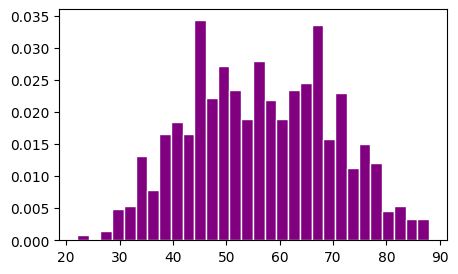

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ax.hist(df.age, bins=30, density=True, edgecolor="white", color='purple')

plt.show()

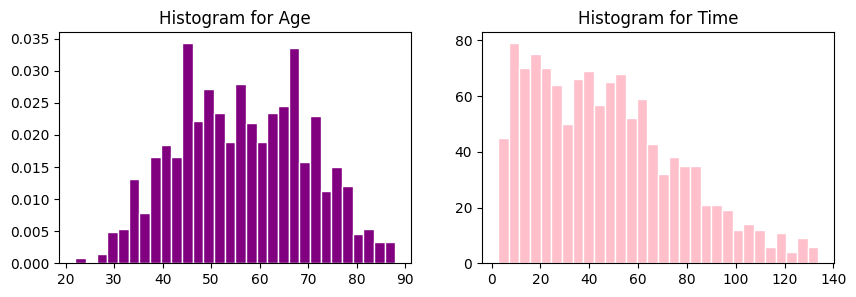

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0].hist(df.age, bins=30, density=True, edgecolor="white", color='purple')
ax[0].set_title('Histogram for Age')

ax[1].hist(df.time, bins=30, density=False, edgecolor="white", color='pink')
ax[1].set_title('Histogram for Time')

plt.show()

### Box Plot (plt.boxplot(x)):

**Definition:** A box plot provides a visual summary of the distribution of a dataset, displaying the median, quartiles, and potential outliers.  

**Use Case:** Box plots are effective for comparing the distribution of different variables or groups, identifying variations and outliers.  

**Analytics Application:** Analyzing box plots supports the detection of variability and central tendency, making them valuable for comparative analytics.

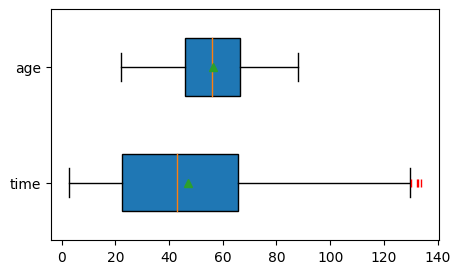

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ax.boxplot(
    x=[df.time,df.age],         # Data to be plotted
    vert=False,                 # Whether to create a vertical boxplot (True) or horizontal (False)
    patch_artist=True,          # If True, fill the box with color
    widths=0.5,                 # Width of the boxes
    sym='r|',                   # Symbol for outliers
    labels=['time', 'age'],     # Labels for each boxplot
    showmeans=True,             # If True, display mean point
    showfliers=True,            # If True, display outliers

)

plt.show()

### Pie Chart (plt.pie(x)):

**Definition:** A pie chart represents data in a circular graph, where each sector illustrates the proportion of each category in the whole.  

**Use Case:** Pie charts are suitable for displaying the contribution of each category to the total, emphasizing relative proportions.  

**Analytics Application:** Pie charts are useful for showcasing the composition of a whole, aiding in the visualization of categorical data distributions.

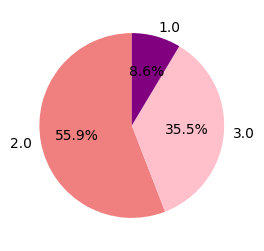

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))


# Assuming 'df' is your DataFrame and 'histgrad' is the column you want to create a pie chart for
histgrad_counts = df['histgrad'].dropna().value_counts()

# Create a pie chart
ax.pie(histgrad_counts, labels=histgrad_counts.index, autopct='%.1f%%', startangle=90, colors=['lightcoral', 'pink', 'purple'])


plt.show()

### Bar Chart (plt.bar(x, height)):

**Definition:** A bar chart represents categorical data with rectangular bars, where the length of each bar corresponds to the value it represents.  

**Use Case:** Bar charts are effective for comparing the values of different categories, providing a clear visual comparison.  

**Analytics Application:** Analyzing bar charts helps in understanding the distribution of categorical data and identifying patterns or trends.

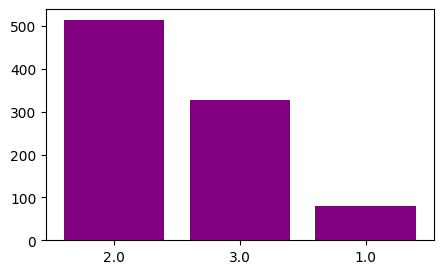

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))


# Assuming 'df' is your DataFrame and 'histgrad' is the column you want to create a pie chart for
histgrad_counts = df['histgrad'].dropna().value_counts()

# Create a pie chart
ax.bar(histgrad_counts.index, height=histgrad_counts, color="purple")


plt.show()

### Scatter Plot (plt.scatter(x, y)):

**Definition:** A scatter plot displays individual data points on a two-dimensional graph, highlighting the relationship between two continuous variables.  

**Use Case:** Scatter plots are used to identify patterns, correlations, or clusters within data points.  

**Analytics Application:** Analyzing scatter plots is valuable for understanding the relationship between two variables, aiding in correlation and trend analysis.

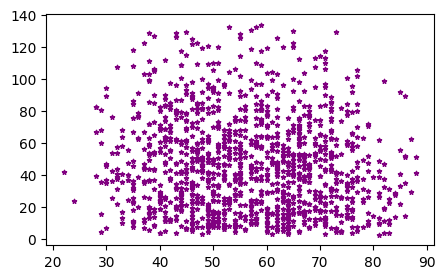

In [26]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ax.scatter(df.age, df.time, marker='*', s=10, c='purple')

plt.show()

### Line Plot (plt.plot(x, y)):
​
**Definition:** A line plot represents data points connected by straight lines, often used to visualize trends or patterns over a continuous range.  
​
**Use Case:** Line plots are suitable for displaying trends, changes, or patterns in data over a continuous scale.  
​
**Analytics Application:** Analyzing line plots facilitates the interpretation of temporal or sequential data, helping to identify trends or changes over time.

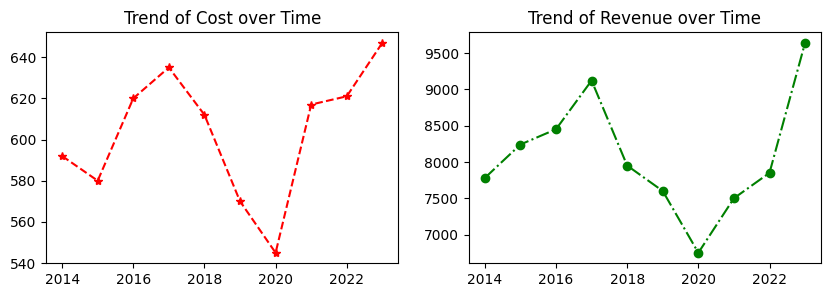

In [27]:
import matplotlib.pyplot as plt

year = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
cost = [592, 580, 620, 635, 612, 570, 545, 617, 621, 647]
revenue = [7780, 8240, 8450, 9120, 7950, 7600, 6750, 7500, 7850, 9640]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0].plot(year, cost, marker='*', linestyle='--', color='red')
ax[0].set_title('Trend of Cost over Time')

ax[1].plot(year, revenue, marker='o', linestyle='-.', color='green')
ax[1].set_title('Trend of Revenue over Time')

plt.show()

### Pair Plot (seaborn.pairplot):

**Definition:** A pair plot is a grid of scatterplots and histograms that provides a quick visual overview of the relationships between multiple variables in a dataset.  

**Use Case:** Pair plots are useful for exploring pairwise relationships in multivariate datasets, revealing correlations and patterns.  

**Analytics Application:** Seaborn's pair plot is particularly effective for identifying trends and clusters in complex datasets with multiple variables.

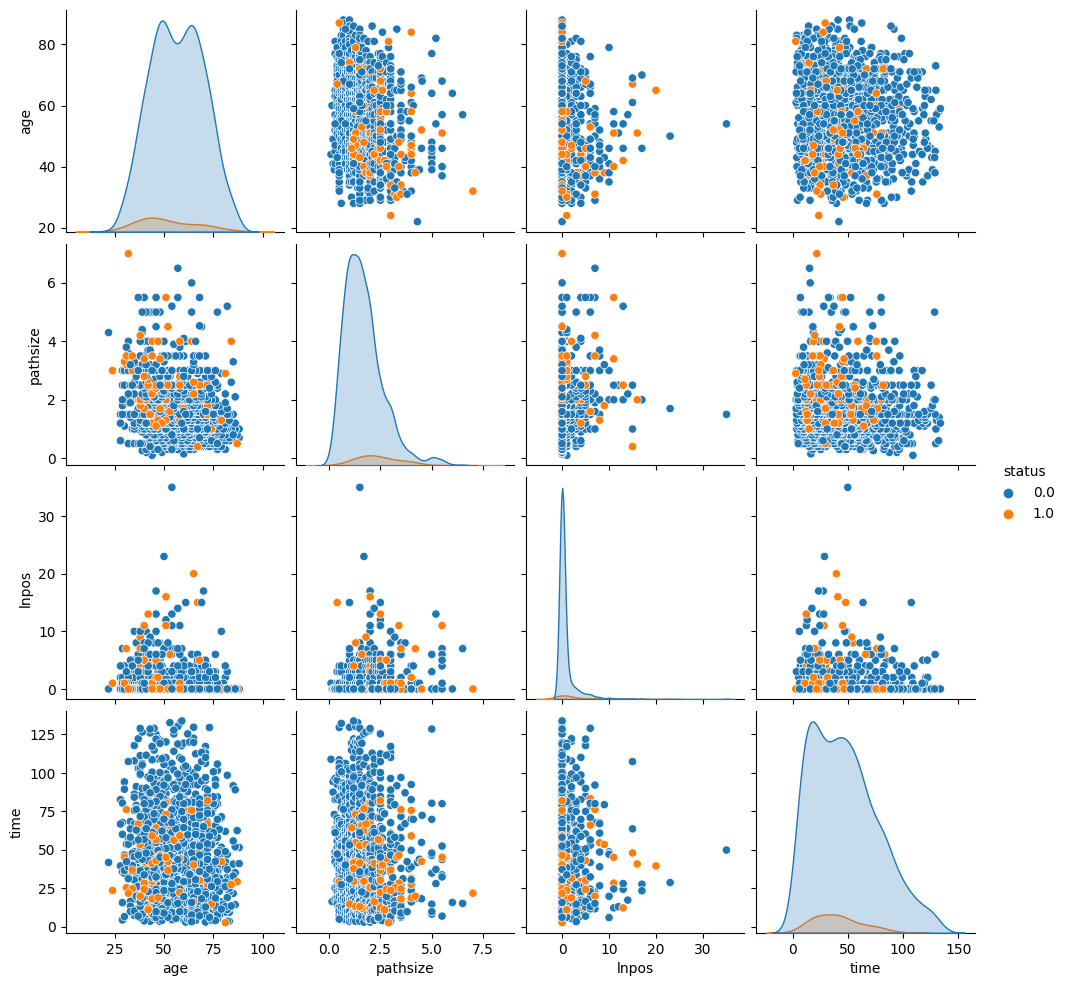

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='status', vars=continuous_var, kind='scatter', diag_kind='kde', dropna=True)  
# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’} 
# diag_kind{‘auto’, ‘hist’, ‘kde’, None}

plt.show()

### Box Plot (seaborn.boxplot):

**Definition:** Seaborn's box plot is an enhanced version of the traditional box plot, offering better aesthetics and additional features.  

**Use Case:** Similar to Matplotlib's box plot, Seaborn's version is valuable for comparing distributions and detecting outliers in different categories or groups.  

**Analytics Application:** Seaborn's box plot is preferred for its enhanced visual appeal and added functionality.

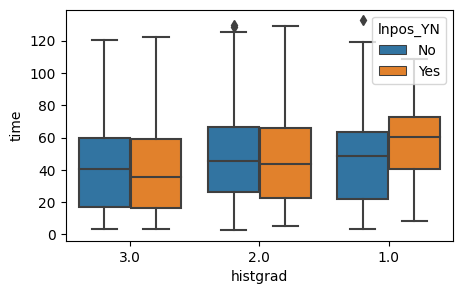

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3))

#sns.boxplot(df, x="pathsize_Cat", y="time", hue="lnpos_YN", ax=ax)
sns.boxplot(df, x="histgrad", y="time", hue="lnpos_YN", ax=ax)

plt.show()

### Count Plot (seaborn.countplot):

**Definition:** A count plot is a bar plot that shows the counts of observations in each category.  

**Use Case:** Count plots are effective for visualizing the distribution of categorical variables and comparing the frequency of different categories.  

**Analytics Application:** Seaborn's count plot simplifies the creation of bar plots for categorical data, providing a clear and concise representation of counts.

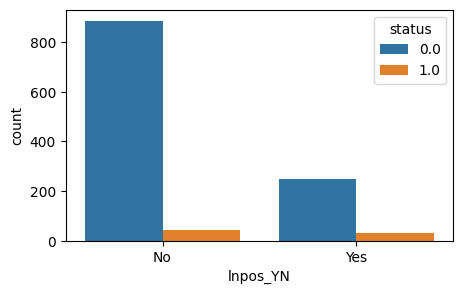

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(df, x='lnpos_YN', hue='status', ax=ax)

plt.show()


### Violin Plot (seaborn.violinplot):

**Definition:** A violin plot combines elements of a box plot and a kernel density plot, displaying the distribution of data across different categories.  

**Use Case:** Violin plots are useful for visualizing the distribution and density of data, making them particularly effective for comparing multiple groups.  

**Analytics Application:** Seaborn's violin plot provides a more informative representation of data distribution compared to traditional box plots.

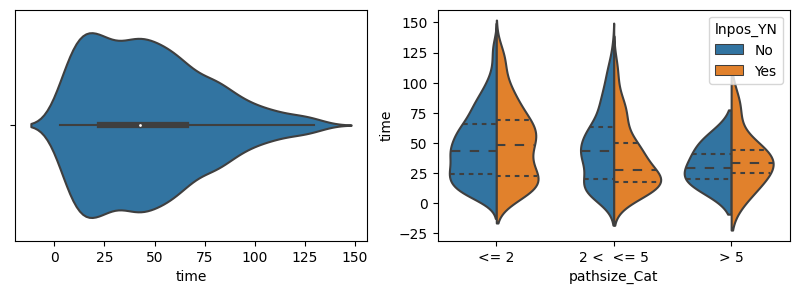

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

sns.violinplot(df, x='time', ax=ax[0])
sns.violinplot(df, x='pathsize_Cat', y='time', hue='lnpos_YN', split=True, inner="quart", ax=ax[1])

plt.show()

### Heatmap (seaborn.heatmap):

**Definition:** A heatmap visualizes data in a matrix format, with color intensity indicating the magnitude of values.  

**Use Case:** Heatmaps are valuable for exploring relationships and patterns in a matrix of data, such as correlation matrices.  

**Analytics Application:** Seaborn's heatmap enhances aesthetics and customization options, making it a preferred choice for visually representing matrix data.

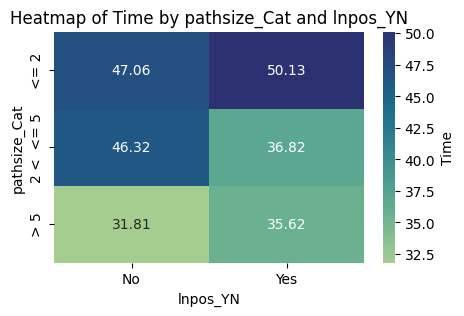

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3))

# Create pivot_table from 'pathsize_Cat', 'lnpos_YN', and 'time'.
heatmap_data = df.pivot_table(values='time', index='pathsize_Cat', columns='lnpos_YN', aggfunc='mean')

# Create a heatmap
sns.heatmap(heatmap_data, cmap='crest', annot=True, fmt=".2f", cbar_kws={'label': 'Time'}, ax=ax)
plt.title('Heatmap of Time by pathsize_Cat and lnpos_YN')
plt.show()


### Point Plot (seaborn.pointplot):

**Definition:** A point plot shows point estimates and confidence intervals as vertical lines, making it useful for comparing the central tendency of different groups.  

**Use Case:** Point plots are effective for displaying means or other summary statistics across categories.  

**Analytics Application:** Seaborn's point plot provides a visually appealing way to compare point estimates, adding value through enhanced aesthetics.

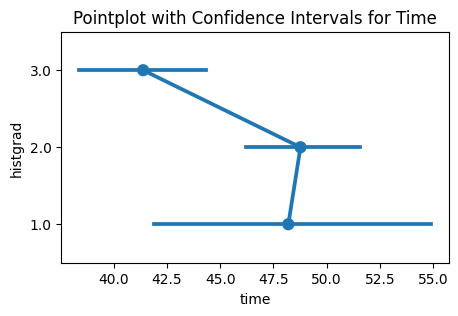

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3))

# Assuming 'time' is a column in your DataFrame
sns.pointplot(df, x='time', y='histgrad', errorbar=("ci", 95), ax=ax)
plt.title('Pointplot with Confidence Intervals for Time')
plt.show()